#| label: intro

# Course material 5
## Lesson 6 (16.11.2023)

### Polars

+ [polars website](https://pola-rs.github.io/polars/)
+ [API](https://pola-rs.github.io/polars/py-polars/html/reference/index.html)

##### Series and DataFrames

+ [API: Series](https://pola-rs.github.io/polars/py-polars/html/reference/series/index.html)

In [103]:
import polars as pl

# a series is a 1-dimensional data structure
s = pl.Series(name = "a", values = [1,2,3,4,5])
s

# find minimum and maximum of your series
s.min()
s.max()
s.mean()
s.median()

b
str
"""polar"""
"""bear"""
"""arctic"""
"""polarr fox"""
"""polarr bear"""


working with strings in Series

In [104]:
# replace values in a series
s2 = pl.Series(name = "b", values = ["pola", "bear", "arctic", "polar fox", "polar bear"])
s2.str.replace("pola", "polar")
s2.str.contains("bear")
any(s2.str.contains("bear"))

b
str
"""polar"""
"""bear"""
"""arctic"""
"""polarr fox"""
"""polarr bear"""


A DataFrame is a 2-dimensional data structure that is backed by a Series, and it could be seen as an abstraction of on collection (e.g. list) of Series

In [ ]:
from datetime import datetime
import numpy as np

# create a data frame out of series
df = pl.DataFrame(
    {
        "integer": np.arange(1, 6),
        "date": [datetime(2022, 1, i) for i in range(1,6)],
        "float": np.arange(4, 9, dtype= np.float64)
    }
)

df

# show only head of the data frame (here: first 3 rows)
df.head(3)

# show only last 3 rows
df.tail(3)

# sample n number of random rows from your data frame
df.sample(2)

# get summary statistics of your data frame
df.describe()

#### Expressions

The expressions offer a versatile structure that both solves easy queries and is easily extended to complex ones.

In [ ]:
# select all columns/rows from your data frame
df.select(pl.col("*")) # all columns
df[:]                  # all rows

# specify specific column/row that you want to return
df.select(pl.col("date","integer"))
df[3]

# select specific columns and only the first three rows
df.select(pl.col("date","integer")).limit(3)
df.select(pl.col("date","integer"))[:3]        # alternative

# exclude specific column
df.select(pl.exclude("date"))

#### Filter and create new columns
The filter option allows us to create a subset of the DataFrame and to select specific rows (cases)

In [ ]:
# maintain only cases that lie between 1st and 4th January 2022
df.filter(
    pl.col("date").is_between(datetime(2022, 1, 2), datetime(2022, 1, 4)),
)

# more complex filters: filter condition on two columns
df.filter((pl.col("integer") <= 3) & (pl.col("float") > 4))

# with_columns allows you to create new columns for your analyses. 
# We create one column that sums all float values together, we call it "sum" 
df.with_columns(pl.col("float").sum().alias("sum"))
# alternatively:
df.with_columns(sum = pl.col("float").sum())
# or when you want to add only a suffix / prefix
df.with_columns(pl.col("float").sum().name.suffix("_sum"))
df.with_columns(pl.col("float").sum().name.prefix("sum_"))

#### Group_by and combining of two data frames

In [ ]:
# lets create a new data frame
df2 = pl.DataFrame(
    {
        "x": np.arange(0, 8),
        "y": ["A", "A", "A", "B", "B", "C", "X", "X"],
    }
)

# compute the number of occurences in column "y"
df2.group_by("y", maintain_order=True).count()

# with the agg() method you can specify several aggregation methods for the selected column at once
# here: (1) occurrence of elements in col "y" and (2) cumulative sum of count
df2.group_by("y", maintain_order=True).agg(
    pl.col("*").sum().alias("sum"),
    (pl.col("*").sum()**2).alias("sum_squared"),
)

# or alternatively you can write:
df2.group_by("y", maintain_order=True).agg(
    sum = pl.col("*").sum(),
    sum_squared = (pl.col("*").sum()**2),
)

In [ ]:
# create a new data frame, by manipluating columns from df2 
df3 = df2.with_columns((pl.col("x")**2).alias("x^2")).select(pl.exclude("y"))
df3

# join both data frames together
df3.join(df2, on = "x", how = "inner") 

### Matplotlib

+ [API](https://matplotlib.org/stable/api/index.html)

In [ ]:
import matplotlib.pyplot as plt

+ Matplotlib graphs your data on `Figures`, 
+ each of which can contain one or more `Axes`, and
+ an area where points can be specified in terms of x-y coordinates.

### Parts of a Figure

[figure parts](https://matplotlib.org/stable/_images/anatomy.png)
<img src="https://matplotlib.org/stable/_images/anatomy.png" width="400"/>

+ **Figure**
  + whole figure, keeps track of
  + all the child `Axes`
  + special artists (e.g., title, legend, colorbars, etc.)
  + nested subfigures
 
Different ways to create a new figure:

<Figure size 640x480 with 0 Axes>

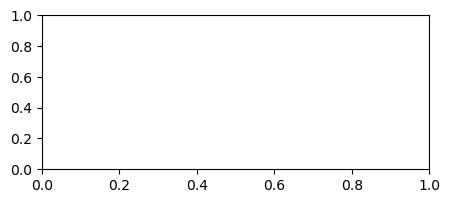

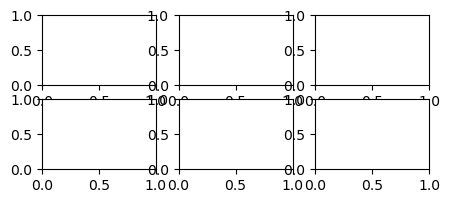

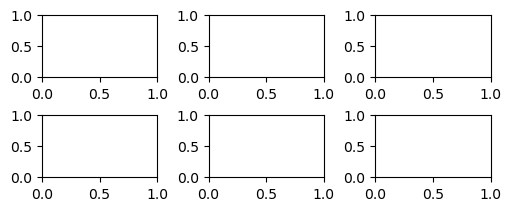

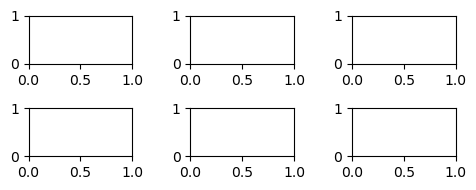

In [105]:
# create an empty figure
fig = plt.figure()      
plt.show()

# create a figure with a single Axes for x and y
fig, ax = plt.subplots(figsize = (5,2))
plt.show()

# create a figure with a 2x2 grid
fig, ax = plt.subplots(2,3, figsize = (5,2)) # nrow, ncol
plt.show()

# Note: In order to avoid overlapping of axes in suplots you
# can use different methods:
fig, ax = plt.subplots(2,3, constrained_layout = True,
                       figsize = (5,2))
# or alternatively
fig, ax = plt.subplots(2,3, figsize = (5,2))
plt.tight_layout()

+ **Axes**
    + Artist attached to a Figure
    + contains a region for plotting data, and usually includes 2 or 3 Axis objects that provide ticks and tick labels to provide scales for the data
    + Each Axes also has
        + a title (`set_title()`),
        + an x- and y-label (`set_xlabel()`, `set_ylabel()`)
+ **Axis**
    + set the scale and limits
    + generate ticks (the marks on the Axis) and
    + ticklabels (strings labeling the ticks).
+ **Artist**
    + everything visible on the Figure is an Artist
    + includes Text objects, Line2D objects, collections objects, Patch objects, etc.

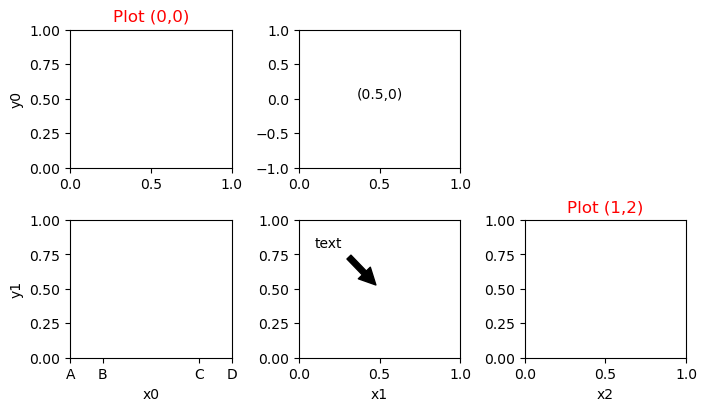

In [105]:
# create 2x3 figure 
fig, ax = plt.subplots(2,3, figsize = (7,4), constrained_layout = True)
# set titles per subplot
ax[0,0].set_title(label = "Plot (0,0)", color = "red")
ax[1,2].set_title(label = "Plot (1,2)", color = "red")
# set label for x and y axis
[ax[1,i].set_xlabel(xlabel = f"x{i}") for i in range(3)]
[ax[i,0].set_ylabel(ylabel = f"y{i}") for i in range(2)]
# remove last plot in first row
ax[0,2].set_axis_off()
# set limits of y-axis for 2nd plot in 1st row
ax[0,1].set_ylim(bottom = -1, top = 1)
# modify ticks on the x-axis (1st plot 2nd row)
ax[1,0].set_xticks(ticks = [0,1,4,5])
# add new labels to modified x-ticks
ax[1,0].set_xticklabels(labels = ["A","B","C","D"])
# create text 
ax[0,1].text(x = 0.5, y = 0, s = "(0.5,0)", ha = "center")
# draw an annotated arrow
ax[1,1].annotate('text', xy=(0.5, 0.5), xytext=(0.1, 0.8),
                arrowprops=dict(facecolor='black', shrink=0.1))
plt.show()

### Coding Styles

+ object-oriented (OO) style: create axes and figures explicitely (will be used in this course)
   + "explicit" because each object is explicitly referenced, and used to make the next object 
+ pyplot-style: create and manage figures and axes implicitely
   + pyplot module shadows most of the Axes plotting methods
 
Example for pyplot-style:

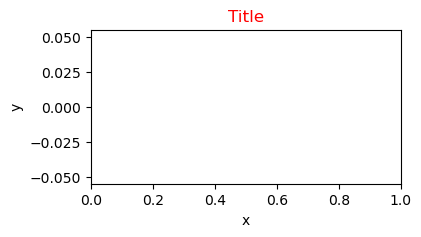

In [86]:
# create an empty figure
plt.figure(figsize = (4,2))
# create a plot (here empty)
plt.plot()
# label x and y axis
plt.xlabel("x")
plt.ylabel("y")
# give plot a title
plt.title("Title", color = "red")
# give limits to the x-axis
plt.xlim(0,1)
# show plot
plt.show()

Text(0, 0.5, 'sepal length (cm)')

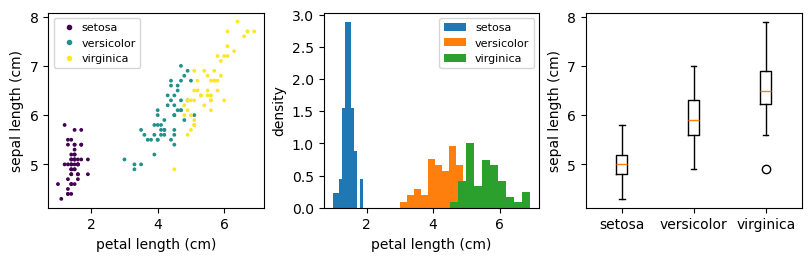

In [110]:
### Some further remarks on plots
import numpy as np
import polars as pl
from sklearn import datasets

d = datasets.load_iris()

dat = pl.DataFrame(data=d["data"], schema=d["feature_names"])
dat = dat.with_columns(group = pl.lit(d["target"]))

fig, ax = plt.subplots(1,3, constrained_layout = True, figsize = (8,2.5))
# create scatter plot
sc = ax[0].scatter(x = dat["petal length (cm)"], 
                     y = dat["sepal length (cm)"],  # data
                     s = 3,                         # size of scatter points
                     c = dat["group"])              # color data according to a grouping variable 
# add legend to scatter plot
ax[0].legend(sc.legend_elements()[0],         # get values from the grouping variable
               np.unique(d["target_names"]),    # rename [0,1,2] to [setosa,versicolor,virginica]
               fontsize = 8,                    # size of label text
               markerscale = 0.5,               # size of handle 
               handletextpad = 0.1)             # distance between label text and handle
# set labels of x and y-axis
ax[0].set_xlabel("petal length (cm)")
ax[0].set_ylabel("sepal length (cm)")

# create histogram
[ax[1].hist(dat.filter(pl.col("group") == i)["petal length (cm)"], bins = 10, label = d["target_names"][i], density = True) for i in range(3)]
ax[1].legend(fontsize = 8, markerscale = 0.5)
ax[1].set_xlabel("petal length (cm)")
ax[1].set_ylabel("density")

# create boxplot
[ax[2].boxplot(dat.filter(pl.col("group") == i)["sepal length (cm)"], positions = [i]) for i in range(3)]
ax[2].set_xticklabels(labels = d["target_names"])
ax[2].set_ylabel("sepal length (cm)")

## Working with seaborn

+ Seaborn is a library for making statistical graphics in Python which builds on top of matplotlib.
+ Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands.

+ the code in seaborn is hierarchically structured. We can differentiate between
   + **modules** that achieve similar visualization goals (distributions, relations, categorical)
   + **functions** within a module that share a lot of underlying code and offer module specific features

+ In addition to the different modules, there is a cross-cutting classification of seaborn functions as 
   + **axes-level functions** plot data onto a single `matplotlib.pyplot.Axes` object, which is the return value of the function.
   + **figure-level functions** interface with matplotlib through a seaborn object, usually a `FacetGrid`, that manages the figure

+ Each module has a single figure-level function, which offers a unitary interface to its various axes-level functions. The organization looks a bit like this:
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" width="500"/>

This is a bit abstract. So, let's come to examples!

In [2]:
# import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# load and inspect first rows of example dataset
d2 = sns.load_dataset("tips")
d2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Module: Relational plots

+ *axes-level* functions for visualizing statistical relationships:
    + `scatterplot()`
    + `lineplot()` 
+ *figure-level function* combines a FacetGrid with one of both axes-level functions
    + `relplot()` 
      
+ figure-level plots look mostly like their axes-level counterparts, except of:
    + legend (placed outside the plot for figure-level plots)
    + subplots (figure-level functions can create figures with multiple subplots)
    + combining different kinds of plots (better with axes-level functions)

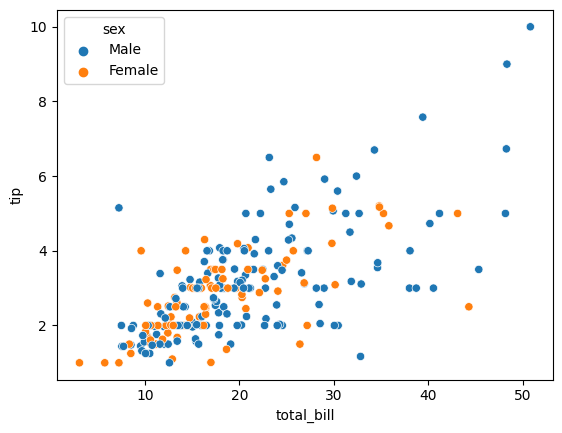

In [3]:
# axes-level function
sns.scatterplot(
    data = d2,                     # specify dataset
    x = "total_bill", y = "tip",   # x-y axis
    hue = "sex"                    # color gradient 
)
plt.show()

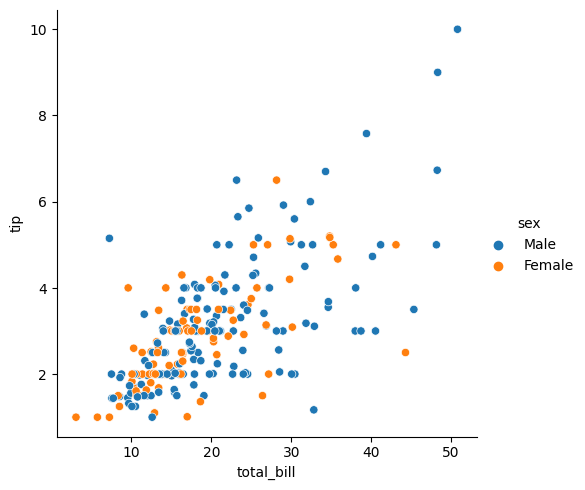

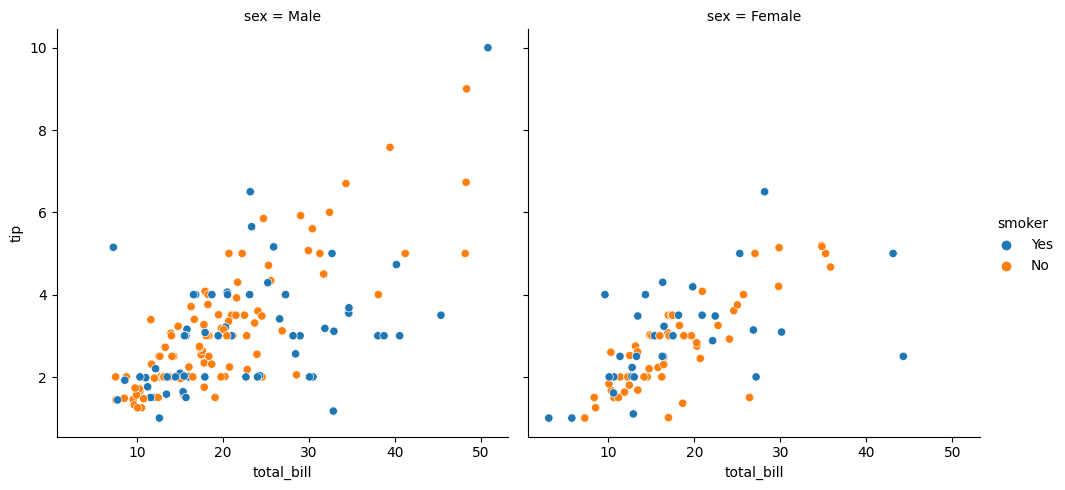

In [13]:
# corresponding figure-level function with scatterplot on the axes-level
sns.relplot(
    data = d2,                     # specify dataset
    kind = "scatter",              # kind of plot: scatter plot
    x = "total_bill", y = "tip",   # x-y axis
    hue = "sex"                   # color gradient 
)

# create two subplots for female and male
sns.relplot(
    data = d2,                     # specify dataset
    kind = "scatter",              # kind of plot: scatter plot
    x = "total_bill", y = "tip",   # x-y axis
    col = "sex",                  # var values in columns
    hue = "smoker"
)

+ axes-level functions are written to act like drop-in replacements for matplotlib functions
+ they can be composed into arbitrarily-complex matplotlib figures
+ particularily useful in this aspect is the `ax` argument: 

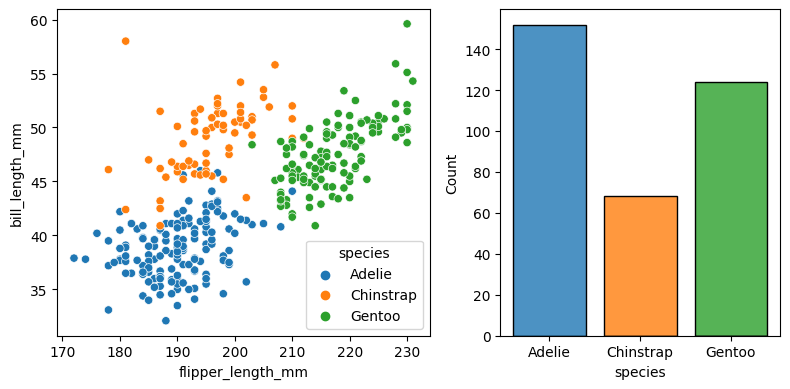

In [17]:
# load an example data set
penguins = sns.load_dataset("penguins")

# create an empty 1x2 figure with different ratios for right and left plot
fig, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
# scatterplot for the first axis (specify axis with the 'ax' argument)
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
# histogram for the second axis (specify axis with the 'ax' argument)
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8,  legend=False, ax=axs[1])
# Adjust the padding between and around subplots
fig.tight_layout()

+ figure-level functions
   + cannot (easily) be composed with other plots
   + return a FacetGrid instance, which has a few methods for customizing attributes of the plot 

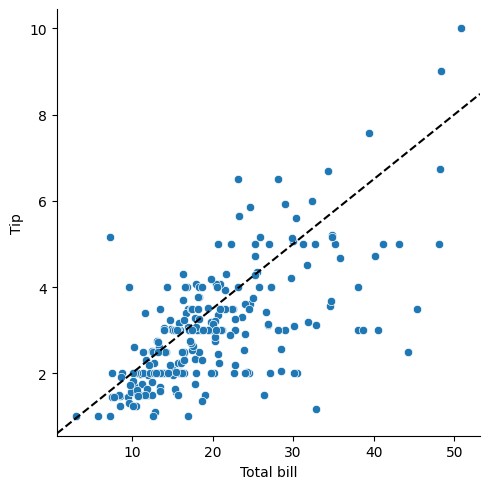

In [22]:
# load example data set
tips = sns.load_dataset("tips")

# create a relational plot (figure-level function)
# and save it as a new object
g = sns.relplot(data=tips, x="total_bill", y="tip")
# use the new object to access the matplotlib axes 
# draw a diagonal line
g.ax.axline(xy1=(10, 2), slope=.15, color="black", linestyle = "--")
# modify x- and y-label
g.set_axis_labels("Total bill", "Tip")

### Specifying the figure size

+ axes-level function
    + `figsize()`
    + `set_size_inches()`
+ figure-level function:
    + have own parameters to control the size
    + parameters correspond to the size of each subplot, rather than the size of the overall figure

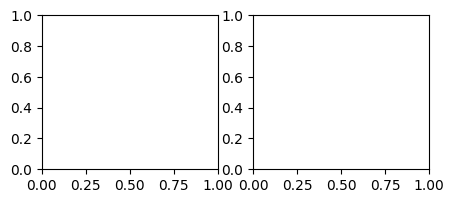

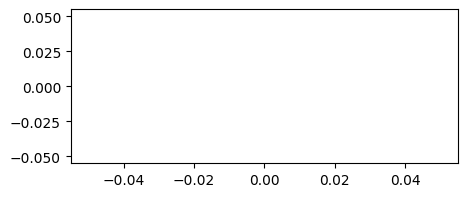

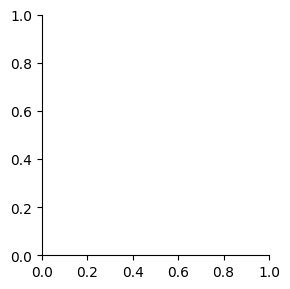

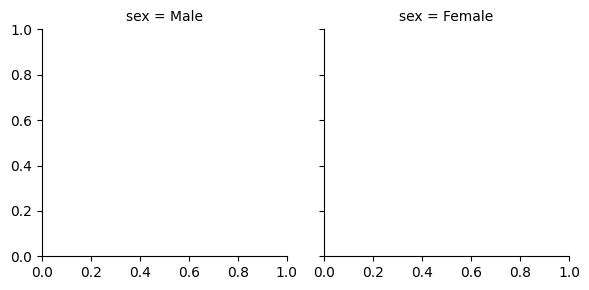

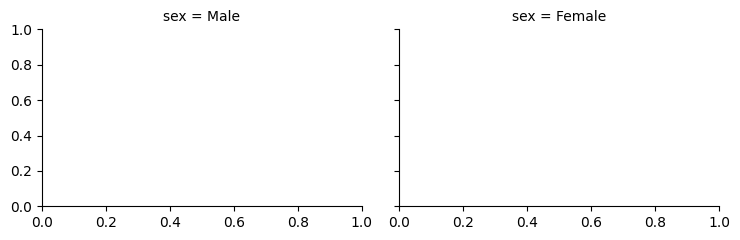

In [23]:
# subplots
fig, axs = plt.subplots(1,2, figsize = (5,2))

# figure
fig2 = plt.figure()
plt.plot()
fig2.set_size_inches((5,2))

# figure-level function: 
g = sns.FacetGrid(penguins)
g = sns.FacetGrid(penguins, col="sex")
g = sns.FacetGrid(penguins, col="sex", height=2.5, aspect=1.5)

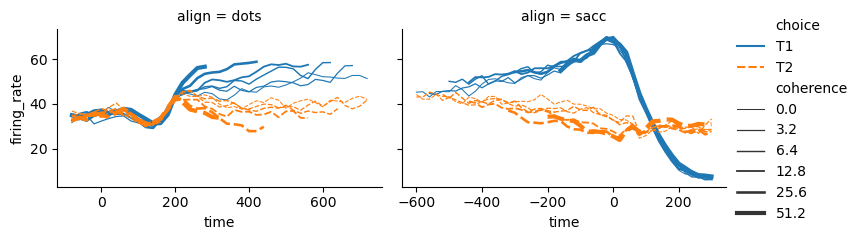

In [99]:
dots = sns.load_dataset("dots")
sns.relplot(
    facet_kws = dict(sharex=False),  # allow variable x-axis per column plot
    data = dots,                     # specify data set
    kind = "line",                   # kind of plot: line plot
    x = "time", y = "firing_rate",  
    col = "align",                   # var values in rows
    hue = "choice", 
    size = "coherence", style = "choice",
    height = 2.5, aspect = 1.5
)

### `jointplot()` and `pairplot()` 

+ jointplot() and pairplot() employ multiple kinds of plots from different modules to represent multiple aspects of a dataset in a single figure
+ Both are figure-level functions and create figures with multiple subplots by default.
+ But they use different objects to manage the figure: `JointGrid` and `PairGrid`, respectively.

`jointplot()` plots the relationship or joint distribution of two variables while adding marginal axes that show the univariate distribution of each one separately:

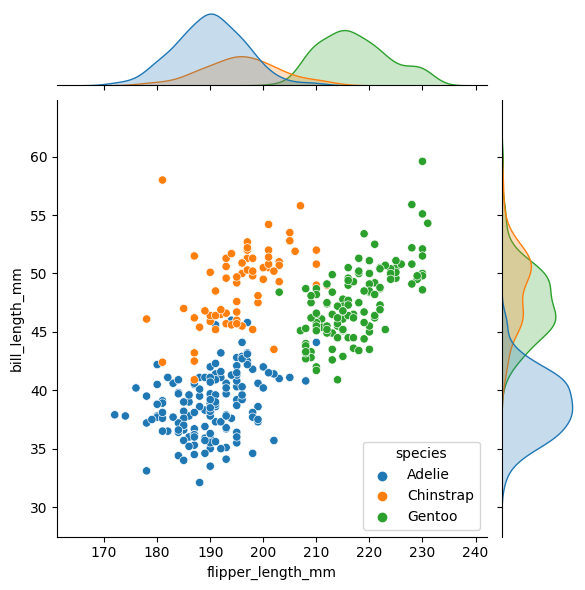

In [10]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

`pairplot()` is similar — it combines joint and marginal views — but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously:

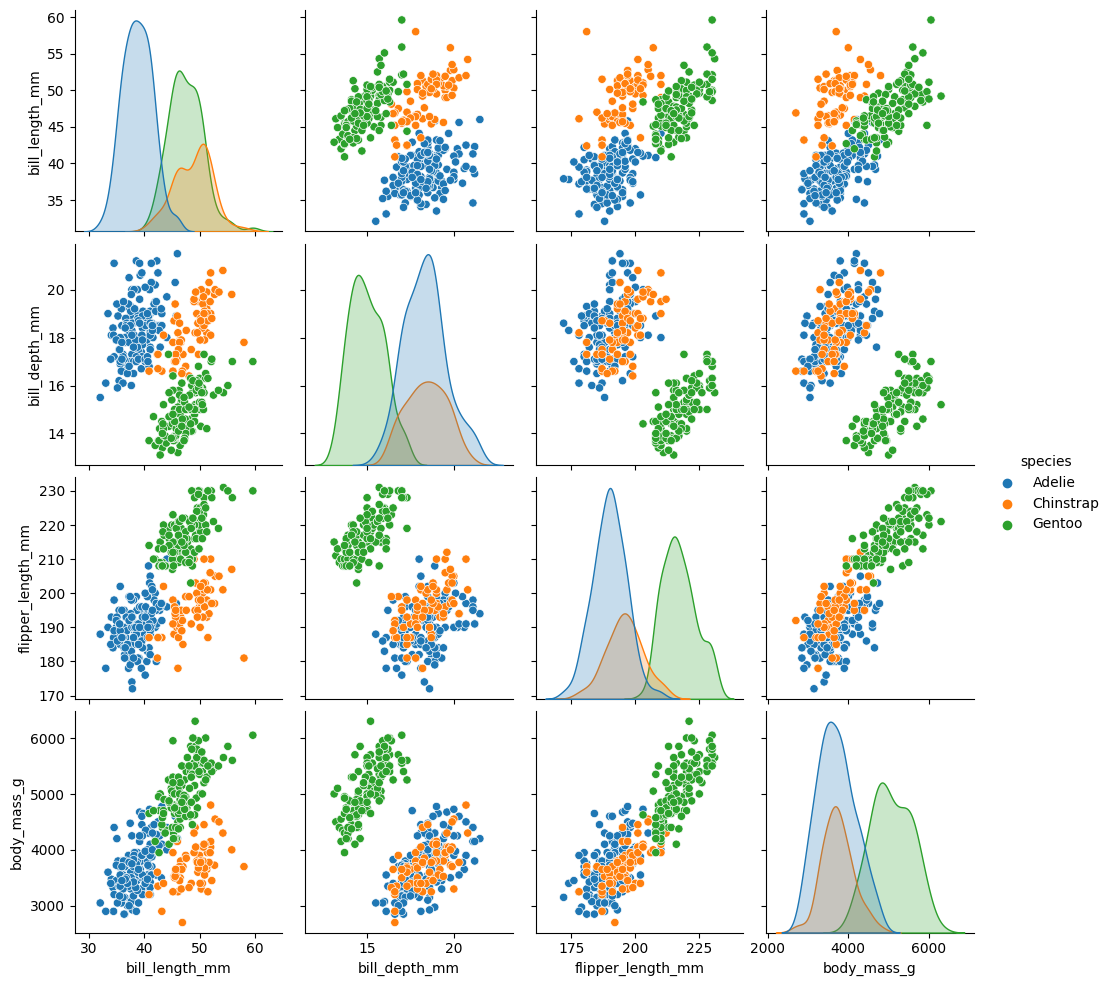

In [11]:
sns.pairplot(data=penguins, hue="species")

https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/matplotlib-exercises.ipynb

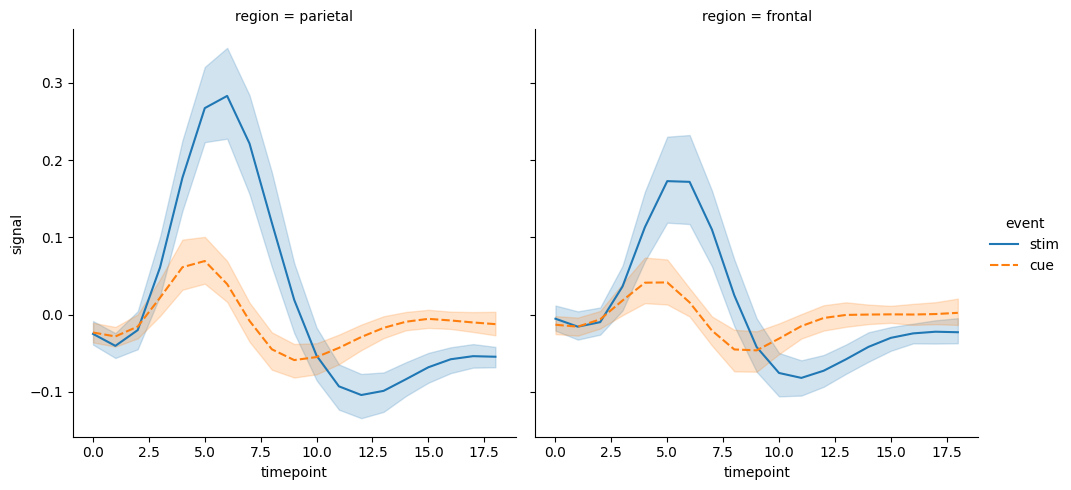

In [12]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

### Distributional representations

+ often we want to investigate the distribution of variables in our data set

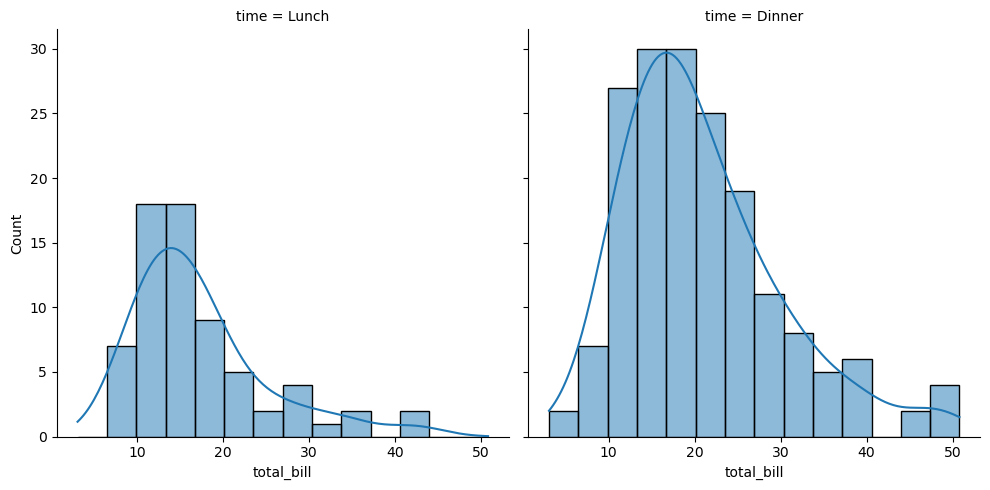

In [47]:
sns.displot(data=tips, x="total_bill", 
            col="time",              
            kde=True)